In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE




In [2]:
session_df = pd.read_csv("../data/final/final_behavior_dataset.csv")

In [3]:


# Features
X = session_df[['nt_count', 'trans2_count', 'duration']]

# Labels
y = session_df['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:


logreg = LogisticRegression(max_iter=1000, random_state=42)


logreg.fit(X_train, y_train)


y_pred_logreg = logreg.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))


Accuracy: 0.9966666666666667

Confusion Matrix:
 [[295   0]
 [  1   4]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       295
           1       1.00      0.80      0.89         5

    accuracy                           1.00       300
   macro avg       1.00      0.90      0.94       300
weighted avg       1.00      1.00      1.00       300



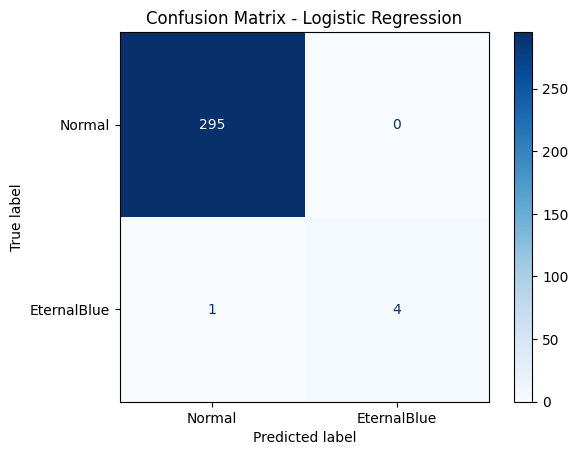

In [ ]:

disp = ConfusionMatrixDisplay.from_estimator(
    logreg,         
    X_test,          
    y_test,         
    display_labels=["Normal", "EternalBlue"],  
    cmap=plt.cm.Blues, 
    normalize=None     
)


disp.ax_.set_title("Confusion Matrix - Logistic Regression")
plt.show()


In [6]:
def plot_label_distribution(y, title):
    label_counts = pd.Series(y).value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(label_counts, labels=label_counts.index, autopct="%1.1f%%", 
            startangle=90, colors=['#66b3ff','#ff6666'])
    plt.title(title)
    plt.show()


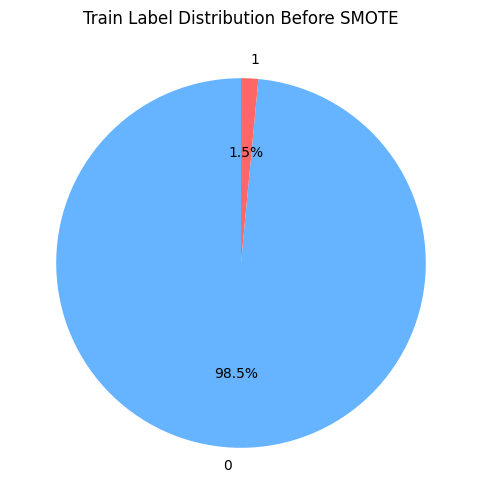

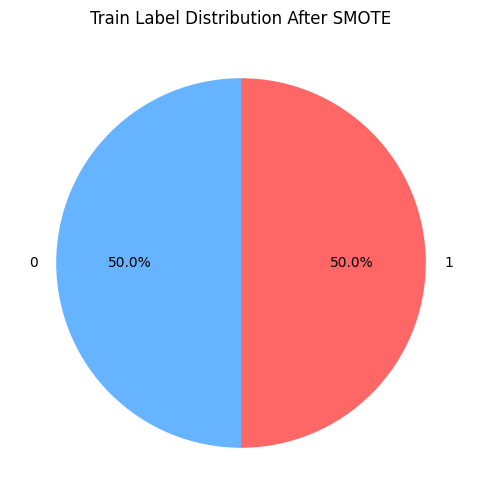

Confusion Matrix:
[[295   0]
 [  0   5]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       295
           1       1.00      1.00      1.00         5

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



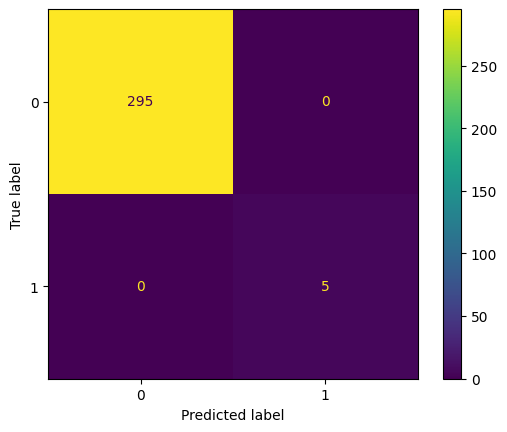

In [7]:
# 1️⃣ Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


plot_label_distribution(y_train, "Train Label Distribution Before SMOTE")

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

plot_label_distribution(y_train_res, "Train Label Distribution After SMOTE")


model = LogisticRegression()
model.fit(X_train_res, y_train_res)

y_pred_logreg_smote = model.predict(X_test)

# 6️⃣ Metrics
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_logreg_smote)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg_smote))

# 7️⃣ Confusion Matrix Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()

In [8]:


clf = RandomForestClassifier(n_estimators=100, random_state=42)


clf.fit(X_train, y_train)

y_pred_rf = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 1.0

Confusion Matrix:
 [[295   0]
 [  0   5]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       295
           1       1.00      1.00      1.00         5

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



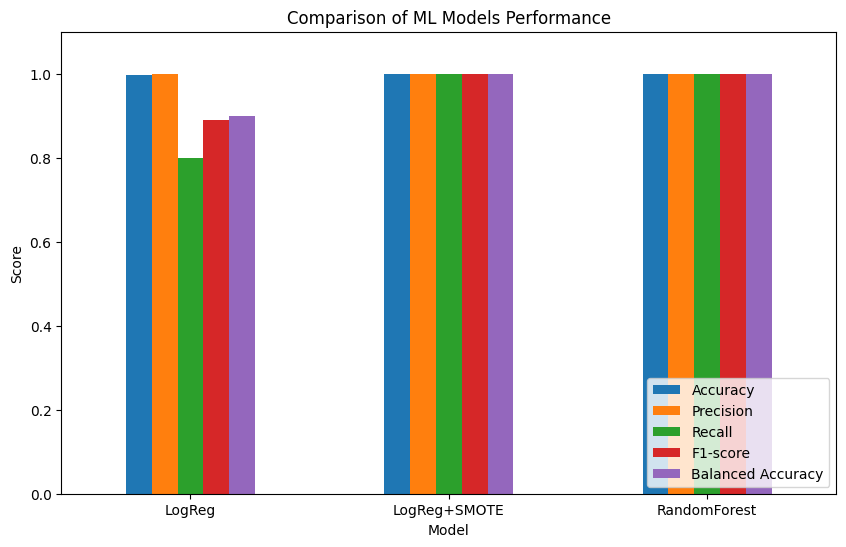

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score



results = pd.DataFrame({
    'Model': ['LogReg', 'LogReg+SMOTE', 'RandomForest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_logreg),
        accuracy_score(y_test, y_pred_logreg_smote),
        accuracy_score(y_test, y_pred_rf)
    ],
    'Precision': [
        precision_score(y_test, y_pred_logreg),
        precision_score(y_test, y_pred_logreg_smote),
        precision_score(y_test, y_pred_rf)
    ],
    'Recall': [
        recall_score(y_test, y_pred_logreg),
        recall_score(y_test, y_pred_logreg_smote),
        recall_score(y_test, y_pred_rf)
    ],
    'F1-score': [
        f1_score(y_test, y_pred_logreg),
        f1_score(y_test, y_pred_logreg_smote),
        f1_score(y_test, y_pred_rf)
    ],
    'Balanced Accuracy': [
        balanced_accuracy_score(y_test, y_pred_logreg),
        balanced_accuracy_score(y_test, y_pred_logreg_smote),
        balanced_accuracy_score(y_test, y_pred_rf)
    ]
})


metrics = ['Accuracy','Precision','Recall','F1-score','Balanced Accuracy']
results.set_index('Model', inplace=True)
results[metrics].plot(kind='bar', figsize=(10,6))
plt.title("Comparison of ML Models Performance")
plt.ylabel("Score")
plt.ylim(0,1.1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()


In [11]:
from joblib import dump

dump(model, "../models/eternalblue_model.joblib")
dump(scaler, "../models/scaler.joblib")

['../models/scaler.joblib']